In [2]:
import pandas as pd
import numpy as np
import requests

import json # library to handle JSON files

!pip -q install geopy
from geopy.geocoders import Nominatim

#import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!#conda install -c conda-forge folium=0.5.0 --yes 
!pip -q install folium
import folium # map rendering library

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 266kB 10.3MB/s eta 0:00:01
Libraries imported.


In [3]:
df=pd.read_html('https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore')[2]
df.head()

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km2),Population[7],Density (/km2)
0,Ang Mo Kio,NaN,宏茂桥,Hóng mào qiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wù luò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bì shān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wén lǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí bā dū,புக்கிட் பாத்தோக்,West,11.13,153740,14000


In [4]:
df = df.drop(df.columns[[1, 2, 3, 4, 6,7,8]], axis=1)
df.head()

,Name (English),Region
0,Ang Mo Kio,North-East
1,Bedok,East
2,Bishan,Central
3,Boon Lay,West
4,Bukit Batok,West


In [5]:
df = df.rename(columns={'Name (English)': 'Town', 'Population[7]': 'Population'})
df.head()

,Town,Region
0,Ang Mo Kio,North-East
1,Bedok,East
2,Bishan,Central
3,Boon Lay,West
4,Bukit Batok,West


In [6]:
#create the dataframe with the geographical coordinates of each neighborhood(town)
geolocator = Nominatim(user_agent="Singapore_explorer")

df['Town_Coord']= df['Town'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Town_Coord'].apply(pd.Series)

df.drop(['Town_Coord'], axis=1, inplace=True)
df

,Town,Region,Latitude,Longitude
0,Ang Mo Kio,North-East,1.370080,103.849523
1,Bedok,East,1.323976,103.930216
2,Bishan,Central,1.350986,103.848255
3,Boon Lay,West,1.338550,103.705812
4,Bukit Batok,West,1.349057,103.749591
5,Bukit Merah,Central,4.559288,101.025582
6,Bukit Panjang,West,1.379149,103.761413
7,Bukit Timah,Central,1.354690,103.776372
8,Central Water Catchment,North,1.375708,103.801743
9,Changi,East,36.839435,119.401326


In [7]:
#drop row due to incorrect lat long provided by geolocator
df.drop(df.index[[5, 9, 20, 21, 24, 25, 28, 32, 34, 35, 41, 48, 50, 51, 53]], axis=0, inplace=True)
df

,Town,Region,Latitude,Longitude
0,Ang Mo Kio,North-East,1.370080,103.849523
1,Bedok,East,1.323976,103.930216
2,Bishan,Central,1.350986,103.848255
3,Boon Lay,West,1.338550,103.705812
4,Bukit Batok,West,1.349057,103.749591
6,Bukit Panjang,West,1.379149,103.761413
7,Bukit Timah,Central,1.354690,103.776372
8,Central Water Catchment,North,1.375708,103.801743
10,Changi Bay,East,1.316850,104.020649
11,Choa Chu Kang,West,1.384749,103.744534


In [10]:
#grouping the neighborhoods(town) by their region
df_region = df['Region'].value_counts()
df_region= df_region.to_frame().reset_index()
df_region.columns = ['Region', 'Frequency']
df_region

,Region,Frequency
0,Central,15
1,West,8
2,North-East,7
3,East,5
4,North,5


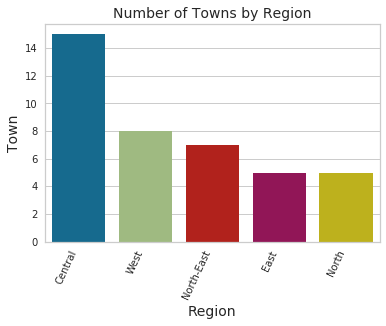

<Figure size 1440x864 with 0 Axes>

In [15]:
#visualize the number of neighborhood(town) by region
import seaborn as sns
from matplotlib import pyplot as plt

bar_plot=sns.barplot(x='Region', y='Frequency', data=df_region)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=65, horizontalalignment='right')

plt.title('Number of Towns by Region', fontsize=14)
plt.xlabel("Region", fontsize=14)
plt.ylabel ("Town", fontsize=14)
fig = plt.figure(figsize=(20,12))
plt.show()

In [16]:
address = 'Singapore'

geolocator = Nominatim(user_agent="singapore_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Singapore is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore is 1.2904753, 103.8520359.


In [17]:
#create map to visualize the neighborhoods in Singapore
town_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, town in zip(df['Latitude'], df['Longitude'], df['Town']):
    label = '{}'.format(town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(town_map)  
    
town_map

In [18]:
#defining foursquare credentials and version
CLIENT_ID = 'JU5YDFOT1SVRT43Q4ADZQWS2SMSLCTJIMDVTQ4BGFXVSA1LI' #Foursquare ID
CLIENT_SECRET = 'MV4DN3LTTZLV4W32ZOGW00LWFEQMTFABQ0ITH4GBZDMYUZEM' #Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JU5YDFOT1SVRT43Q4ADZQWS2SMSLCTJIMDVTQ4BGFXVSA1LI
CLIENT_SECRET:MV4DN3LTTZLV4W32ZOGW00LWFEQMTFABQ0ITH4GBZDMYUZEM


In [19]:
#top 100 venues that are in jurong east area within a radius of 500 meters.

LIMIT =100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=JU5YDFOT1SVRT43Q4ADZQWS2SMSLCTJIMDVTQ4BGFXVSA1LI&client_secret=MV4DN3LTTZLV4W32ZOGW00LWFEQMTFABQ0ITH4GBZDMYUZEM&ll=1.2904753,103.8520359&v=20180605&radius=500&limit=100'

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f4dfe69772b2a5fc5f16148'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Core',
  'headerFullLocation': 'Downtown Core, Singapore',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 85,
  'suggestedBounds': {'ne': {'lat': 1.2949753045000045,
    'lng': 103.85652864198435},
   'sw': {'lat': 1.2859752954999955, 'lng': 103.84754315801565}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d438c6514aa8cfa743d5c3d',
       'name': 'National Gal\xadlery Singa\xadpore',
       'location': {'address': "1 St. Andrew's Road",
        'lat': 1.2907395913341984,
        'lng': 103.85154786540198,
        'labeledLatLngs': [{'label

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
town_venue = getNearbyVenues(names=df['Town'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

In [23]:
print(town_venue.shape)
town_venue.head()

(1403, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,1.37008,103.849523,Old Chang Kee,1.369094,103.848389,Snack Place
1,Ang Mo Kio,1.37008,103.849523,FairPrice Xtra,1.369279,103.848886,Supermarket
2,Ang Mo Kio,1.37008,103.849523,MOS Burger,1.369170,103.847831,Burger Joint
3,Ang Mo Kio,1.37008,103.849523,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
4,Ang Mo Kio,1.37008,103.849523,PLAYe,1.369109,103.848225,Hobby Shop


In [24]:
coffee_shop = town_venue[town_venue['Venue Category'].str.contains('Coffee Shop')].reset_index(drop=True)
coffee_shop.index = np.arange(1, len(coffee_shop)+1)
print (coffee_shop['Venue Category'].value_counts())

Coffee Shop    80
Name: Venue Category, dtype: int64


In [25]:
print('There are {} uniques categories.'.format(len(coffee_shop['Venue Category'].unique())))

There are 1 uniques categories.


In [26]:
print ("Venue Category: Coffee Shop: ", coffee_shop.shape)
coffee_shop.head(10)

Venue Category: Coffee Shop:  (80, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Ang Mo Kio,1.370080,103.849523,ST31 Coffee Shop,1.367478,103.848334,Coffee Shop
2,Ang Mo Kio,1.370080,103.849523,"Coffee Shop, Block 422, Ang Mo Kio Ave 3",1.368119,103.851093,Coffee Shop
3,Ang Mo Kio,1.370080,103.849523,Starbucks,1.369230,103.848683,Coffee Shop
4,Ang Mo Kio,1.370080,103.849523,AMK 347 Food House,1.367602,103.848372,Coffee Shop
5,Bedok,1.323976,103.930216,Ya Kun Kaya Toast 亞坤,1.324095,103.929198,Coffee Shop
6,Bedok,1.323976,103.930216,Starbucks,1.324760,103.929644,Coffee Shop
7,Bedok,1.323976,103.930216,Starbucks,1.324568,103.932518,Coffee Shop
8,Bedok,1.323976,103.930216,Mr Teh Tarik Eating House,1.326869,103.930212,Coffee Shop
9,Bedok,1.323976,103.930216,金福海鲜菜馆 @ Chai Chee Ave,1.324798,103.925924,Coffee Shop
10,Bishan,1.350986,103.848255,Starbucks,1.349849,103.850415,Coffee Shop


In [27]:
#identify the number of coffee shop in venue category group by neighborhood
coffee_shop1 = coffee_shop.groupby(['Neighborhood'])['Venue Category']
coffee_shop1 = coffee_shop1.apply(lambda x: x[x.str.contains('Coffee Shop')].count())
coffee_shop1

Neighborhood
Ang Mo Kio         4
Bedok              5
Bishan             4
Boon Lay           3
Bukit Batok        4
Bukit Panjang      4
Choa Chu Kang      2
Clementi           5
Downtown Core      3
Hougang            3
Jurong East        5
Jurong West        3
Kallang            1
Marine Parade      1
Novena             6
Outram             1
Pasir Ris          2
Paya Lebar         3
Punggol            1
Sembawang          2
Sengkang           2
Serangoon          3
Singapore River    1
Tampines           4
Toa Payoh          6
Yishun             2
Name: Venue Category, dtype: int64

In [28]:
#convert series to dataframe
coffee_shop_df = coffee_shop1.to_frame().reset_index()
coffee_shop_df.columns = ['Neighborhood', 'Total Coffee Shop']
coffee_shop_df

,Neighborhood,Total Coffee Shop
0,Ang Mo Kio,4
1,Bedok,5
2,Bishan,4
3,Boon Lay,3
4,Bukit Batok,4
5,Bukit Panjang,4
6,Choa Chu Kang,2
7,Clementi,5
8,Downtown Core,3
9,Hougang,3


In [29]:
#sort the number of coffee shop by descending order
coffee_shop_df.sort_values(by=['Total Coffee Shop'], ascending=False, inplace= True)
coffee_shop_df

,Neighborhood,Total Coffee Shop
24,Toa Payoh,6
14,Novena,6
7,Clementi,5
1,Bedok,5
10,Jurong East,5
0,Ang Mo Kio,4
23,Tampines,4
2,Bishan,4
4,Bukit Batok,4
5,Bukit Panjang,4


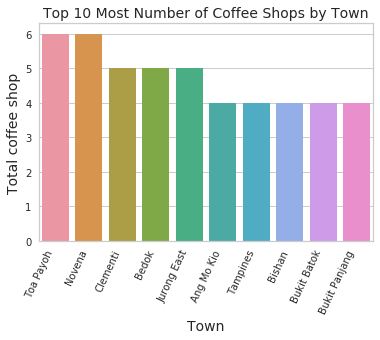

<Figure size 1440x864 with 0 Axes>

In [30]:
#create a bar plot to visualize the top 10 neighborhood with the most number of coffee shop
bar_plot=sns.barplot(x="Neighborhood", y="Total Coffee Shop", data=coffee_shop_df[0:10])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=65, horizontalalignment='right')

plt.title('Top 10 Most Number of Coffee Shops by Town', fontsize=14)
plt.xlabel("Town", fontsize=14)
plt.ylabel ("Total coffee shop", fontsize=14)
fig = plt.figure(figsize=(20,12))
plt.show()

In [31]:
#create map to visualize the coffee shop in the neighborhood
coffee_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, town in zip(coffee_shop['Venue Latitude'], coffee_shop['Venue Longitude'], coffee_shop['Neighborhood']):
    label = '{}'.format(town)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(coffee_map)  
    
coffee_map

In [33]:
#Analyze each neighborhood
# one hot encoding
coffee_onehot = pd.get_dummies(town_venue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
coffee_onehot['Neighborhood'] = town_venue['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [coffee_onehot.columns[-1]] + list(coffee_onehot.columns[:-1])
coffee_onehot = coffee_onehot[fixed_columns]

coffee_onehot.head()

,Zoo Exhibit,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
coffee_grouped = coffee_onehot.groupby('Neighborhood').mean().reset_index()
coffee_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Ang Mo Kio,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.024390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000
1,Bedok,0.0,0.000000,0.000000,0.017544,0.000000,0.000000,0.00,0.000000,0.052632,...,0.000000,0.000000,0.017544,0.000000,0.000000,0.00,0.00,0.017544,0.000000,0.000000
2,Bishan,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.046512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000
3,Boon Lay,0.0,0.000000,0.000000,0.014286,0.000000,0.000000,0.00,0.000000,0.085714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.014286,0.000000,0.000000
4,Bukit Batok,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000
5,Bukit Panjang,0.0,0.000000,0.000000,0.025000,0.000000,0.000000,0.00,0.000000,0.050000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000
6,Bukit Timah,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.583333,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000
7,Changi Bay,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000
8,Choa Chu Kang,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.045455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000
9,Clementi,0.0,0.000000,0.000000,0.016949,0.000000,0.000000,0.00,0.016949,0.050847,...,0.000000,0.000000,0.000000,0.016949,0.000000,0.00,0.00,0.000000,0.000000,0.000000


In [35]:
coffee_venues=coffee_grouped[["Neighborhood","Coffee Shop"]]
coffee_venues

,Neighborhood,Coffee Shop
0,Ang Mo Kio,0.097561
1,Bedok,0.087719
2,Bishan,0.093023
3,Boon Lay,0.042857
4,Bukit Batok,0.166667
5,Bukit Panjang,0.100000
6,Bukit Timah,0.000000
7,Changi Bay,0.000000
8,Choa Chu Kang,0.090909
9,Clementi,0.084746


In [36]:
#Import KMeans from sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, random_state=5)
X = coffee_venues.drop(['Neighborhood'], axis=1)
kmeans.fit(X)
kmeans.labels_[0:10]

array([4, 4, 4, 3, 1, 4, 0, 0, 4, 4], dtype=int32)

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


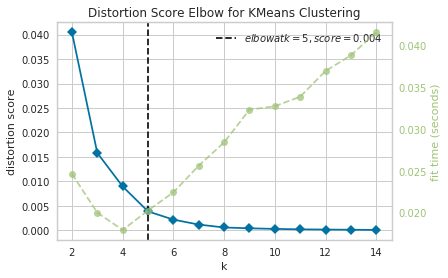

In [37]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() #Finalize and render the figure

In [38]:
#According to the elbow score, the best K is 5
kclusters = 5

coffee_grouped_clustering = coffee_venues.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coffee_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 1, 2, 0, 4, 4, 0, 0], dtype=int32)

In [39]:
# create a new dataframe that includes the cluster label
coffee_merged = coffee_venues.copy()
coffee_merged["Cluster Labels"] = kmeans.labels_
coffee_merged.head()

,Neighborhood,Coffee Shop,Cluster Labels
0,Ang Mo Kio,0.097561,0
1,Bedok,0.087719,0
2,Bishan,0.093023,0
3,Boon Lay,0.042857,1
4,Bukit Batok,0.166667,2


In [40]:
#Merge the dataframe with cluster labels with town_venue dataframe that has latitude/longitude for each neighborhood
#coffee_merged = pd.merge(coffee_merged, town_venue, left_index=True, right_index=True, how='inner')
coffee_merged = coffee_merged.join(town_venue.set_index("Neighborhood"), on="Neighborhood")
coffee_merged.head()

,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,0.097561,0,1.37008,103.849523,Old Chang Kee,1.369094,103.848389,Snack Place
0,Ang Mo Kio,0.097561,0,1.37008,103.849523,FairPrice Xtra,1.369279,103.848886,Supermarket
0,Ang Mo Kio,0.097561,0,1.37008,103.849523,MOS Burger,1.369170,103.847831,Burger Joint
0,Ang Mo Kio,0.097561,0,1.37008,103.849523,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
0,Ang Mo Kio,0.097561,0,1.37008,103.849523,PLAYe,1.369109,103.848225,Hobby Shop


In [41]:
# sort the results by Cluster Labels
coffee_merged.sort_values(by=['Cluster Labels'], inplace= True)
coffee_merged

,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,0.097561,0,1.370080,103.849523,Old Chang Kee,1.369094,103.848389,Snack Place
27,Sengkang,0.064516,0,1.391924,103.895491,Sengkang Sculpture Park,1.394549,103.896630,Sculpture Garden
27,Sengkang,0.064516,0,1.391924,103.895491,Cold Storage,1.392342,103.895037,Supermarket
27,Sengkang,0.064516,0,1.391924,103.895491,LeNu 樂牛,1.392415,103.895052,Noodle House
27,Sengkang,0.064516,0,1.391924,103.895491,Châteraisé,1.392245,103.895079,Bakery
27,Sengkang,0.064516,0,1.391924,103.895491,Ya Kun Family Cafe,1.391903,103.894913,Café
27,Sengkang,0.064516,0,1.391924,103.895491,Starbucks,1.392367,103.895018,Coffee Shop
27,Sengkang,0.064516,0,1.391924,103.895491,Maki-san,1.392311,103.894969,Sushi Restaurant
27,Sengkang,0.064516,0,1.391924,103.895491,Canton Paradise,1.392299,103.895128,Chinese Restaurant
12,Hougang,0.076923,0,1.370801,103.892544,Phoon Huat & Co,1.371222,103.894695,Kitchen Supply Store


In [43]:
# create map to show the coordinates from the dataset itself, just averaging Latitude/Longitude of the current dataset 
#latitude1 = df['Latitude'].mean()
#longitude1 = df['Longitude'].mean()
#print('The geographical coordinates of Singapore are {}, {}'.format(latitude, longitude))

#map_clusters = folium.Map(location=[latitude1, longitude1], zoom_start=11)

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighborhood, cluster in zip(coffee_merged['Neighborhood Latitude'], coffee_merged['Neighborhood Longitude'], coffee_merged['Neighborhood'], coffee_merged['Cluster Labels']):
    label = folium.Popup(str(neighborhood) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [45]:
#Cluster 1 
df.rename(columns={'Town':'Neighborhood'}, inplace=True)
df_left = df[['Region','Neighborhood']]
df_right = coffee_merged.loc[coffee_merged['Cluster Labels'] == 0]
cluster1 = pd.merge(df_left, df_right, on='Neighborhood')
cluster1

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,Old Chang Kee,1.369094,103.848389,Snack Place
1,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,Bun Master,1.369242,103.849031,Bakery
2,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,AMK 347 Food House,1.367602,103.848372,Coffee Shop
3,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,Express Teppan-Yaki,1.369137,103.848232,Japanese Restaurant
4,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,AMK Hub,1.369284,103.848542,Shopping Mall
5,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,POSB Ang Mo Kio Central Branch,1.370969,103.847341,Bank
6,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,LiHO,1.369103,103.848241,Bubble Tea Shop
7,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,Malaysia Boleh!,1.369441,103.849066,Food Court
8,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,Takagi Ramen,1.369263,103.847046,Ramen Restaurant
9,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,Cathay Cineplexes,1.369321,103.848718,Multiplex


In [46]:
#identify the number of occurence for each type of venue category
cluster1['Venue Category'].value_counts()[0:10]

Coffee Shop             46
Food Court              27
Chinese Restaurant      26
Fast Food Restaurant    23
Asian Restaurant        21
Café                    20
Japanese Restaurant     20
Supermarket             16
Sandwich Place          16
Shopping Mall           16
Name: Venue Category, dtype: int64

In [47]:
#filter cluster 1 to show only coffee shops 
cluster1_coffeeshop = cluster1[cluster1['Venue Category'].str.contains("Coffee Shop")].reset_index(drop=True)
#cluster1_coffeeshop.drop_duplicates(subset ="Coffee Shop",inplace = True)
#print("shape:", cluster1_coffeeshop.shape)
cluster1_coffeeshop

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,AMK 347 Food House,1.367602,103.848372,Coffee Shop
1,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,"Coffee Shop, Block 422, Ang Mo Kio Ave 3",1.368119,103.851093,Coffee Shop
2,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,Starbucks,1.369230,103.848683,Coffee Shop
3,North-East,Ang Mo Kio,0.097561,0,1.370080,103.849523,ST31 Coffee Shop,1.367478,103.848334,Coffee Shop
4,East,Bedok,0.087719,0,1.323976,103.930216,金福海鲜菜馆 @ Chai Chee Ave,1.324798,103.925924,Coffee Shop
5,East,Bedok,0.087719,0,1.323976,103.930216,Mr Teh Tarik Eating House,1.326869,103.930212,Coffee Shop
6,East,Bedok,0.087719,0,1.323976,103.930216,Starbucks,1.324760,103.929644,Coffee Shop
7,East,Bedok,0.087719,0,1.323976,103.930216,Starbucks,1.324568,103.932518,Coffee Shop
8,East,Bedok,0.087719,0,1.323976,103.930216,Ya Kun Kaya Toast 亞坤,1.324095,103.929198,Coffee Shop
9,Central,Bishan,0.093023,0,1.350986,103.848255,Starbucks,1.349849,103.850415,Coffee Shop


In [48]:
#Cluster 2
df_right2=coffee_merged.loc[coffee_merged['Cluster Labels'] == 1]
cluster2 = pd.merge(df_left, df_right2, on='Neighborhood')
cluster2

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West,Boon Lay,0.042857,1,1.338550,103.705812,Bakerzin,1.338967,103.705941,Café
1,West,Boon Lay,0.042857,1,1.338550,103.705812,Shihlin Taiwan Street Snacks 士林台湾小吃,1.338731,103.705332,Asian Restaurant
2,West,Boon Lay,0.042857,1,1.338550,103.705812,Shokutsu TEN Japanese Food Street,1.339402,103.706954,Japanese Restaurant
3,West,Boon Lay,0.042857,1,1.338550,103.705812,Ichiban Boshi,1.338986,103.705913,Japanese Restaurant
4,West,Boon Lay,0.042857,1,1.338550,103.705812,Hee Kee Desserts 囍记,1.338909,103.705730,Dessert Shop
5,West,Boon Lay,0.042857,1,1.338550,103.705812,Golden Village,1.340378,103.706452,Multiplex
6,West,Boon Lay,0.042857,1,1.338550,103.705812,Men-ichi Japanese Ramen (麺いち),1.339376,103.706897,Japanese Restaurant
7,West,Boon Lay,0.042857,1,1.338550,103.705812,McDonald's / McCafé,1.339852,103.706558,Fast Food Restaurant
8,West,Boon Lay,0.042857,1,1.338550,103.705812,Pizza Hut,1.340255,103.706639,Pizza Place
9,West,Boon Lay,0.042857,1,1.338550,103.705812,McDonald's / McCafé,1.339213,103.708676,Fast Food Restaurant


In [49]:
#identify the number of occurence for each type of venue category
cluster2['Venue Category'].value_counts()[0:10]

Japanese Restaurant     28
Chinese Restaurant      24
Fast Food Restaurant    24
Asian Restaurant        21
Coffee Shop             20
Café                    19
Food Court              16
Bakery                  15
Shopping Mall           14
Supermarket             12
Name: Venue Category, dtype: int64

In [50]:
#filter cluster 2 to show only coffee shops 
cluster2_coffeeshop = cluster2[cluster2['Venue Category'].str.contains("Coffee Shop")].reset_index(drop=True)
#cluster2_coffeeshop.drop_duplicates(subset ="Coffee Shop",inplace = True)
#print("shape:", cluster2_coffeeshop.shape)
cluster2_coffeeshop

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West,Boon Lay,0.042857,1,1.338550,103.705812,Starbucks,1.338906,103.705642,Coffee Shop
1,West,Boon Lay,0.042857,1,1.338550,103.705812,Boon Lay Cafe,1.339052,103.705871,Coffee Shop
2,West,Boon Lay,0.042857,1,1.338550,103.705812,Ya Kun Kaya Toast 亞坤,1.340037,103.706676,Coffee Shop
3,Central,Downtown Core,0.030000,1,1.287475,103.856033,Starbucks,1.285632,103.853889,Coffee Shop
4,Central,Downtown Core,0.030000,1,1.287475,103.856033,Starbucks Reserve Store (Starbucks Reserve),1.287049,103.853600,Coffee Shop
5,Central,Downtown Core,0.030000,1,1.287475,103.856033,Starbucks Reserve Store,1.286094,103.859911,Coffee Shop
6,West,Jurong West,0.046875,1,1.339636,103.707339,Boon Lay Cafe,1.339052,103.705871,Coffee Shop
7,West,Jurong West,0.046875,1,1.339636,103.707339,Starbucks,1.338906,103.705642,Coffee Shop
8,West,Jurong West,0.046875,1,1.339636,103.707339,Ya Kun Kaya Toast 亞坤,1.340037,103.706676,Coffee Shop
9,Central,Marine Parade,0.026316,1,1.302689,103.907395,Starbucks,1.298852,103.906765,Coffee Shop


In [51]:
#Cluster 3 
df_right3=coffee_merged.loc[coffee_merged['Cluster Labels'] == 2]
cluster3 = pd.merge(df_left, df_right3, on='Neighborhood')
cluster3

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West,Bukit Batok,0.166667,2,1.349057,103.749591,Pastry Production Kitchen,1.344701,103.748654,Bakery
1,West,Bukit Batok,0.166667,2,1.349057,103.749591,Bukit Batok Plaza Street Soccer Court,1.349226,103.752640,Basketball Court
2,West,Bukit Batok,0.166667,2,1.349057,103.749591,McDonald's / McĆafe,1.349519,103.750206,Fast Food Restaurant
3,West,Bukit Batok,0.166667,2,1.349057,103.749591,Ya Kun Kaya Toast 亞坤 (Family Cafe),1.349963,103.749147,Coffee Shop
4,West,Bukit Batok,0.166667,2,1.349057,103.749591,Sedap Corner Nasi Ayam Hainan,1.349265,103.751667,Malay Restaurant
5,West,Bukit Batok,0.166667,2,1.349057,103.749591,Cathay Cineplex,1.350034,103.749151,Multiplex
6,West,Bukit Batok,0.166667,2,1.349057,103.749591,Yolé,1.349956,103.749135,Frozen Yogurt Shop
7,West,Bukit Batok,0.166667,2,1.349057,103.749591,Bengawan Solo Cafe,1.350018,103.749154,Café
8,West,Bukit Batok,0.166667,2,1.349057,103.749591,Subway,1.349671,103.749576,Sandwich Place
9,West,Bukit Batok,0.166667,2,1.349057,103.749591,Food Park,1.346047,103.749643,Food Court


In [52]:
#filter cluster 3 to show only coffee shops 
cluster3_coffeeshop = cluster3[cluster3['Venue Category'].str.contains("Coffee Shop")].reset_index(drop=True)
cluster3_coffeeshop

#cluster3_coffeeshop.drop_duplicates(subset ="Coffee Shop",inplace = True)
#print("shape:", cluster3_coffeeshop.shape)
#cluster3_coffeeshop

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,West,Bukit Batok,0.166667,2,1.349057,103.749591,Ya Kun Kaya Toast 亞坤 (Family Cafe),1.349963,103.749147,Coffee Shop
1,West,Bukit Batok,0.166667,2,1.349057,103.749591,The Coffee Bean & Tea Leaf,1.350028,103.749244,Coffee Shop
2,West,Bukit Batok,0.166667,2,1.349057,103.749591,Bukit Batok Village Eating House,1.347094,103.747068,Coffee Shop
3,West,Bukit Batok,0.166667,2,1.349057,103.749591,Srisun Prata Shop 24 Hours,1.350417,103.745321,Coffee Shop
4,North,Sembawang,0.125000,2,1.449093,103.820055,Starbucks,1.448128,103.819652,Coffee Shop
5,North,Sembawang,0.125000,2,1.449093,103.820055,Ya Kun Kaya Toast 亞坤,1.448128,103.819441,Coffee Shop
6,Central,Toa Payoh,0.130435,2,1.335391,103.849741,Lucky Pisang Raja,1.333892,103.849840,Coffee Shop
7,Central,Toa Payoh,0.130435,2,1.335391,103.849741,港式小炒 @ Palmspring Market ToaPayoh,1.336585,103.851933,Coffee Shop
8,Central,Toa Payoh,0.130435,2,1.335391,103.849741,Ya Kun Kaya Toast 亞坤,1.332480,103.848529,Coffee Shop
9,Central,Toa Payoh,0.130435,2,1.335391,103.849741,8 Plus Food House,1.338421,103.849311,Coffee Shop


In [53]:
#Cluster 4 
df_right4=coffee_merged.loc[coffee_merged['Cluster Labels'] == 3]
cluster4 = pd.merge(df_left, df_right4, on='Neighborhood')
cluster4

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central,Kallang,0.25,3,1.310759,103.866262,Traveller@sg,1.310463,103.861880,Hostel
1,Central,Kallang,0.25,3,1.310759,103.866262,Oberstrasse,1.308631,103.862403,Coffee Shop
2,Central,Kallang,0.25,3,1.310759,103.866262,Cold Storage,1.310523,103.863945,Supermarket
3,Central,Kallang,0.25,3,1.310759,103.866262,The Refinery,1.310645,103.862432,Restaurant


In [54]:
#identify the number of occurence for each type of venue category
cluster4['Venue Category'].value_counts()[0:10]

Coffee Shop    1
Hostel         1
Restaurant     1
Supermarket    1
Name: Venue Category, dtype: int64

In [55]:
#filter cluster 4 to show only coffee shops 
cluster4_coffeeshop = cluster4[cluster4['Venue Category'].str.contains("Coffee Shop")].reset_index(drop=True)
#cluster4_coffeeshop.drop_duplicates(subset ="Coffee Shop",inplace = True)
#print("shape:", cluster4_coffeeshop.shape)
cluster4_coffeeshop

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central,Kallang,0.25,3,1.310759,103.866262,Oberstrasse,1.308631,103.862403,Coffee Shop


In [56]:
#Cluster 5
df_right5=coffee_merged.loc[coffee_merged['Cluster Labels'] == 4]
cluster5 = pd.merge(df_left, df_right5, on='Neighborhood')
cluster5

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central,Bukit Timah,0.0,4,1.354690,103.776372,Bukit Timah Summit,1.354622,103.776374,Scenic Lookout
1,Central,Bukit Timah,0.0,4,1.354690,103.776372,Rock Path (Closed Trail),1.352416,103.778572,Trail
2,Central,Bukit Timah,0.0,4,1.354690,103.776372,Summit Path (Summit Step),1.354070,103.776971,Trail
3,Central,Bukit Timah,0.0,4,1.354690,103.776372,Summit Hut,1.354693,103.776492,Rest Area
4,Central,Bukit Timah,0.0,4,1.354690,103.776372,Rengas Path,1.356513,103.775482,Trail
5,Central,Bukit Timah,0.0,4,1.354690,103.776372,Bukit Timah Hiking Trails,1.351181,103.778084,Trail
6,Central,Bukit Timah,0.0,4,1.354690,103.776372,Catchment Hut,1.353620,103.779742,Rest Area
7,Central,Bukit Timah,0.0,4,1.354690,103.776372,Jungle Fall Path,1.355846,103.774123,Trail
8,Central,Bukit Timah,0.0,4,1.354690,103.776372,North View Path,1.357757,103.774710,Trail
9,Central,Bukit Timah,0.0,4,1.354690,103.776372,Catchment Path,1.353724,103.779657,Trail


In [57]:
#identify the number of occurence for each type of venue category
cluster5['Venue Category'].value_counts()[0:10]

Indian Restaurant                11
Café                             10
Vegetarian / Vegan Restaurant     9
Chinese Restaurant                9
Trail                             9
Japanese Restaurant               9
Hotel                             8
Food Court                        8
Nightclub                         7
Noodle House                      6
Name: Venue Category, dtype: int64

In [58]:
#filter cluster 5 to show only coffee shops 
cluster5_coffeeshop = cluster5[cluster5['Venue Category'].str.contains("Coffee Shop")].reset_index(drop=True)
#cluster5_coffeeshop.drop_duplicates(subset ="Coffee Shop",inplace = True)
#print("shape:", cluster5_coffeeshop.shape)
cluster5_coffeeshop

,Region,Neighborhood,Coffee Shop,Cluster Labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central,Singapore River,0.01,4,1.289178,103.845154,Dutch Colony Coffee Co.,1.292218,103.842571,Coffee Shop


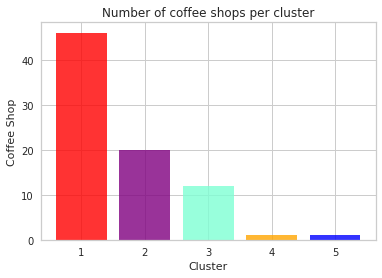

In [59]:
#To visualize the number of coffee shops in each cluster
clusters_mean = [cluster1_coffeeshop['Coffee Shop'].count(),cluster2_coffeeshop['Coffee Shop'].count(),cluster3_coffeeshop['Coffee Shop'].count(),
                 cluster4_coffeeshop['Coffee Shop'].count(),cluster5_coffeeshop['Coffee Shop'].count()]
objects = (1,2,3,4,5)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'orange', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Coffee Shop')
plt.xlabel('Cluster')
plt.title('Number of coffee shops per cluster')

plt.show()